In [6]:
# Import necessary libraries
import os.path

import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import xarray as xr

In [7]:
# Data Management
# processing path must include sentinel bands information vs mask data
processing_path = r"./data"


In [ ]:

# Check Data 

In [8]:

# Read Data using NetCDF4 
file_path = os.path.join(processing_path, 'MSG_202308140630_vis.nc')
nc_file = Dataset(file_path, mode='r')
print(nc_file.variables.keys())

dict_keys(['msg_seviri_fes_3km', 'IR_016_acq_time', 'y', 'x', 'longitude', 'latitude', 'IR_016', 'IR_039_acq_time', 'IR_039', 'IR_087_acq_time', 'IR_087', 'IR_097_acq_time', 'IR_097', 'IR_108_acq_time', 'IR_108', 'IR_120_acq_time', 'IR_120', 'IR_134_acq_time', 'IR_134', 'VIS006_acq_time', 'VIS006', 'VIS008_acq_time', 'VIS008', 'WV_062_acq_time', 'WV_062', 'WV_073_acq_time', 'WV_073'])


In [16]:

VIS008 = nc_file.variables['VIS008'][:]
latitude = nc_file.variables['latitude'][:]
longitude = nc_file.variables['longitude'][:]


In [24]:
m_VIS008 = np.where(np.isnan(VIS008), np.nanmean(VIS008), VIS008)
m_VIS008 = np.where(np.isinf(VIS008), np.nanmean(VIS008), VIS008)

longitude = np.where(np.isinf(longitude), np.nanmean(longitude), longitude)
longitude = np.where(np.isnan(longitude), np.nanmean(longitude), longitude)

latitude = np.where(np.isinf(latitude), np.nanmean(latitude), latitude)
latitude = np.where(np.isnan(latitude), np.nanmean(latitude), latitude)


In [25]:
longitude

array([[inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       ...,
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf]])

ValueError: Axis limits cannot be NaN or Inf

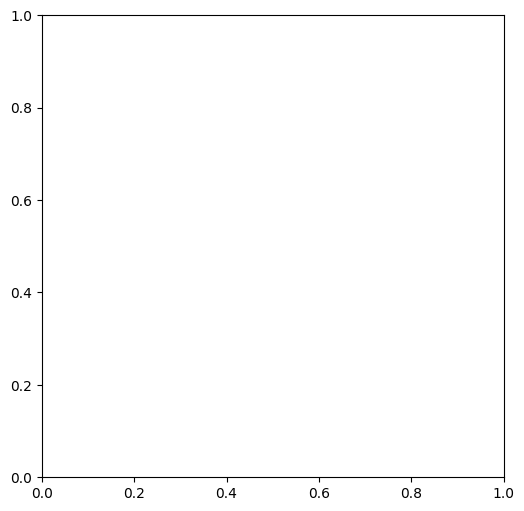

In [18]:

# Display Data 
plt.figure(figsize=(10, 6))
plt.imshow(VIS008, extent=(longitude.min(), longitude.max(), latitude.min(), latitude.max()), origin='lower', cmap='viridis')
plt.colorbar(label='Mean mean_VIS008')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mean mean_VIS008 Distribution')
plt.show()


In [27]:
# Read Data using xarray  

ds = xr.open_dataset(file_path)
print(ds)


<xarray.Dataset> Size: 827MB
Dimensions:             (y: 3712, x: 3712)
Coordinates: (12/15)
    IR_016_acq_time     (y) datetime64[ns] 30kB ...
  * y                   (y) float64 30kB -5.566e+06 -5.563e+06 ... 5.569e+06
  * x                   (x) float64 30kB 5.566e+06 5.563e+06 ... -5.569e+06
    longitude           (y, x) float64 110MB ...
    latitude            (y, x) float64 110MB ...
    IR_039_acq_time     (y) datetime64[ns] 30kB ...
    ...                  ...
    IR_120_acq_time     (y) datetime64[ns] 30kB ...
    IR_134_acq_time     (y) datetime64[ns] 30kB ...
    VIS006_acq_time     (y) datetime64[ns] 30kB ...
    VIS008_acq_time     (y) datetime64[ns] 30kB ...
    WV_062_acq_time     (y) datetime64[ns] 30kB ...
    WV_073_acq_time     (y) datetime64[ns] 30kB ...
Data variables:
    msg_seviri_fes_3km  int64 8B ...
    IR_016              (y, x) float32 55MB ...
    IR_039              (y, x) float32 55MB ...
    IR_087              (y, x) float32 55MB ...
    IR_097    

In [28]:

# Read Data  
# xarray method 
VIS008 = ds['VIS008'].values
latitude = ds['latitude'].values
longitude = ds['longitude'].values


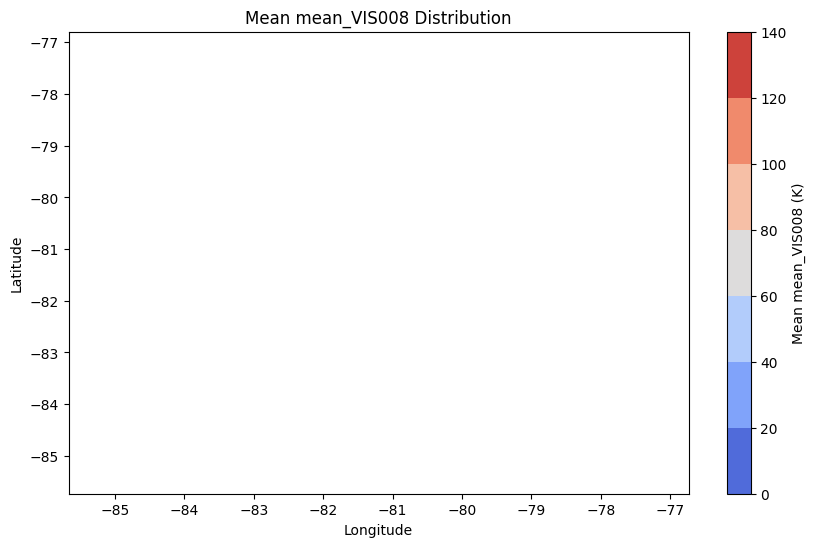

In [29]:

# display  
#  
plt.figure(figsize=(10, 6))
plt.contourf(longitude, latitude, VIS008, cmap='coolwarm')
plt.colorbar(label='Mean mean_VIS008 (K)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mean mean_VIS008 Distribution')
plt.show()


In [ ]:

# Compare Results  
#  Graph  



In [ ]:

# Compare Results  
# Geomap 



In [ ]:

# Export Data  


